In [222]:
import pandas as pd
df = pd.read_csv('./crawling_data/apple_thinq_processing2.csv', encoding='utf-8 sig')

In [213]:
# delete_word = ['앱','더','개','해주다','좋다','사용','자다','않다','너무','아니다','돼다','쓰다','다','어플']
delete_word = ['다','더','게','중','전','시','못','뭐','걸','개','격','재','씽','해','큐','내','만','해도','건가','점','키','수가',\
               '두','도','분','함','통','날','온','적','임','앞','하라','꼭','하니','위','줄','습','볼','뒤','끌','외','곳','G','크롤',\
               '초','난','세','fi','땐','싹','g','은','wi','원','기','쪽','놈','꽉','되어다','해주다','않다','너무','매우','아니다',\
               '돼다']

In [226]:
import ast
df['content_n'] = df['content_n'].apply(lambda x: ast.literal_eval(x))
tokenized_doc=df['content_n'].apply(lambda x:str(list(set(x)-set(delete_word))))
tokenized=[]
for i in range(len(tokenized_doc)):
    tokenized.append(eval(tokenized_doc[i]))  

In [158]:
len(tokenized)

918

### 토픽 빈도수

In [228]:
def flatten(l):
    flatlist = []
    for elem in l:
        if type(elem) == list:
            for e in elem:
                flatlist.append(e)
        else:
            flatlist.append(elem)
    return flatlist

In [229]:
a = df.content_n
aa =[]
for i in range(len(a)):
    aa.append(eval(str(a[i])))

In [230]:
import nltk
from collections import Counter

data2 = flatten(aa)
text = nltk.Text(data2)
count= Counter(text)
count = pd.Series(count)
pd.DataFrame.from_dict(count).sort_values(0,ascending= False)

,0
앱,456
좋다,449
사용,298
업데이트,278
자다,222
...,...
우롱,1
리스트,1
문제해결,1
그건,1


### TF_IDF  
Term Frequency-Inverse Document Frequency  
: 1개의 corpus(문단)에서 1개의 단어가 얼마나 중요한지 가중치를 표현한 것  
DTM은 one-hot인코딩으로 행렬이 커질수록 공간낭비 발생하므로 TF_IDF로 효율화를 함  
(단, 항상 TF_IDF가 효율적인 것은 아님)  

tf(d,t) = 특정 문서 d에서 특정 단어 t의 등장 횟수  
df(t) = 특정 단어 t가 등장한 문서의 수  
idf(d,t) = df(t)에 반비례하는 수

In [231]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import NMF
from sklearn.preprocessing import normalize
from scipy import linalg
from collections import defaultdict

In [232]:
data3=[]

for i in range(len(a)):
    data3.append(' '.join(aa[i]))

vectorizer = TfidfVectorizer()
sp_matrix = vectorizer.fit_transform(data3)
word2id = defaultdict(lambda : 0)
    
for idx, feature in enumerate(vectorizer.get_feature_names()):
    word2id[feature] = idx

In [233]:
tfidf = []
for i, sent in enumerate(data3):
    print('=======%d번째 게시물======='%i)
    print([(token, sp_matrix[i, word2id[token]]) for token in sent.split()])
    tfidf.append([(token, sp_matrix[i, word2id[token]]) for token in sent.split()])

=======0번째 게시물=======
[('스마트', 0.13367900241908717), ('케어', 0.22312511344858657), ('온도', 0.5365881103993162), ('설정', 0.4252348539286735), ('기준', 0.26122635997050814), ('온도', 0.5365881103993162), ('직접', 0.21075447495272603), ('설정', 0.4252348539286735), ('도로', 0.48276570416113584), ('설정', 0.4252348539286735), ('자꾸', 0.16691816744159807), ('희망', 0.25005107586395675), ('온도', 0.5365881103993162), ('도로', 0.48276570416113584), ('가다', 0.16579211896264034)]
=======1번째 게시물=======
[('TV', 0.0), ('연결', 0.20154451333897477), ('유튜브', 0.21831515589642253), ('넷플릭스', 0.24182373574180957), ('네트워크', 0.15754635855088792), ('연결하다', 0.3811191952780882), ('자다', 0.08864888584493381), ('뜨다', 0.12076049439938188), ('씽', 0.0), ('큐', 0.0), ('제품', 0.09561991600660731), ('연결하다', 0.3811191952780882), ('난리', 0.22807209808704898), ('치다', 0.22807209808704898), ('연결', 0.20154451333897477), ('만', 0.0), ('원', 0.0), ('넘다', 0.17834023301023527), ('주다', 0.1620751707475175), ('산', 0.0), ('최신', 0.17129799620564848), ('tv', 0.3

[('기능', 0.24289927977954034), ('단순하다', 0.26311107781441356), ('슬림', 0.29144336539934224), ('만들다', 0.14611904385876684), ('점점', 0.22996442622075186), ('불필요하다', 0.26311107781441356), ('쇼핑', 0.2748700396025114), ('생활', 0.22176204148464368), ('팁', 0.0), ('정보', 0.3732028862285528), ('용량', 0.22996442622075186), ('커지다', 0.29144336539934224), ('느리다', 0.1669989650128816), ('필요하다', 0.18213793834819855), ('기능', 0.24289927977954034), ('정보', 0.3732028862285528), ('없어지다', 0.22565783086346794), ('이전', 0.22565783086346794), ('버전', 0.19342975389971503), ('사용', 0.09968522068195604), ('싶다', 0.17685642810288416)]
=======146번째 게시물=======
[('로그인', 0.3106809056296591), ('튕김', 0.19538158913369025), ('앱', 0.0), ('업데이트', 0.09192879357422873), ('로그인', 0.3106809056296591), ('비밀번호', 0.6834293359820712), ('틀리다', 0.23799105458596936), ('변경', 0.17457939534536854), ('기존', 0.36694718825423484), ('비밀번호', 0.6834293359820712), ('그렇다', 0.13636024255528154), ('기존', 0.36694718825423484), ('비밀번호', 0.6834293359820712), ('생각', 

[('등록', 0.1307751891482961), ('하루', 0.10346168704452623), ('종일', 0.12275282013341256), ('씨름', 0.12823888986989163), ('중', 0.0), ('만', 0.0), ('원', 0.0), ('짜다', 0.12275282013341256), ('중국산', 0.13597107088427604), ('IOT', 0.0), ('기기', 0.21830957778249113), ('이렇다', 0.07982089984008678), ('적', 0.0), ('집안', 0.09303915059095025), ('IOT', 0.0), ('기기', 0.21830957778249113), ('개', 0.0), ('넘다', 0.10027598155229603), ('LG', 0.0), ('제품', 0.05376454191893063), ('되어다', 0.0679004221551263), ('초기', 0.10180238836816471), ('등록', 0.1307751891482961), ('엉망', 0.11849749385144365), ('임', 0.0), ('세계', 0.12275282013341256), ('최대', 0.13597107088427604), ('가전', 0.06515360507644298), ('회사', 0.11208100032871132), ('타이틀', 0.13597107088427604), ('정말', 0.0690062336385663), ('부끄럽다', 0.13597107088427604), ('줄', 0.0), ('알다', 0.08251125527927836), ('함', 0.0), ('문의', 0.09754706208619579), ('말', 0.0), ('똑같다', 0.10728845810464378), ('WI', 0.0), ('FI', 0.0), ('SSID', 0.0), ('특수문자', 0.5438842835371042), ('Password', 0.0), ('특

=======421번째 게시물=======
[('어제', 0.40683925141544264), ('업데이트', 0.19478430846950284), ('정상', 0.38875498921464713), ('실행', 0.42922606299482824), ('안녕하다', 0.23298204905734682), ('어제', 0.40683925141544264), ('업데이트', 0.19478430846950284), ('이후', 0.15144189951630002), ('정상', 0.38875498921464713), ('앱', 0.0), ('실행', 0.42922606299482824), ('아이폰', 0.13297698426017213), ('SE', 0.0), ('아이패드', 0.20699318596163618), ('미니', 0.2109435735473041), ('세대', 0.24134859424203742), ('동일하다', 0.22614608389467078), ('오류', 0.14446417991669502), ('발생', 0.20015722079896012), ('실행', 0.42922606299482824), ('확인', 0.1324598173862584), ('바라다', 0.19179067561426952)]
=======422번째 게시물=======
[('업데이트', 0.22540716593320814), ('어플', 0.25130954775709285), ('작동', 0.4853805874475986), ('멈추다', 0.35662942426702227), ('업데이트', 0.22540716593320814), ('어플', 0.25130954775709285), ('작동', 0.4853805874475986), ('멈추다', 0.35662942426702227), ('삭제', 0.19044550603994886), ('재', 0.0), ('설치', 0.1671759990820087), ('가동', 0.26169945750826407), (

=======526번째 게시물=======
[('알림', 0.3341305475170411), ('숫자', 0.2992069835825801), ('누적', 0.32413368642287294), ('어떻다', 0.11691028216801294), ('해결', 0.11265962436221802), ('xr', 0.1774980772475068), ('사용자', 0.13177294567168954), ('워시', 0.13602360347748446), ('타워', 0.13759972924110672), ('사용', 0.06724891687578842), ('중', 0.0), ('정말', 0.09978160807731849), ('자다', 0.07207473399178384), ('쓰다', 0.081292646132637), ('알림', 0.3341305475170411), ('창', 0.0), ('삭제', 0.12103357395582721), ('작동', 0.2056488439453773), ('알림', 0.3341305475170411), ('아니다', 0.19117961539614095), ('누적', 0.32413368642287294), ('숫자', 0.2992069835825801), ('뜨다', 0.09818262719935993), ('작동', 0.2056488439453773), ('오류', 0.10624513578328927), ('문제', 0.09978160807731849), ('아니다', 0.19117961539614095), ('무시', 0.18543082232670288), ('수도', 0.15513692478695595), ('묘', 0.0), ('신경', 0.15838475593803528), ('거슬리다', 0.1774980772475068), ('차다', 0.12588370523781742), ('다운로드', 0.12384020059249347), ('코스', 0.13602360347748446), ('선택', 0.13759

[('루틴', 0.32977952779313463), ('고치다', 0.06446750646169097), ('들다', 0.05421505833709564), ('공기청정기', 0.16143915975823298), ('루틴', 0.32977952779313463), ('설정', 0.13420711958932147), ('조건', 0.47350730070976005), ('보통', 0.3047285235130052), ('나쁘다', 0.1523642617565026), ('작동', 0.13715110397347427), ('아인', 0.08741590713089756), ('조건', 0.47350730070976005), ('보통', 0.3047285235130052), ('보통', 0.3047285235130052), ('초과', 0.08741590713089756), ('오해', 0.08741590713089756), ('여지', 0.07891788345162667), ('남다', 0.06192183609308491), ('나쁘다', 0.1523642617565026), ('작동', 0.13715110397347427), ('이렇다', 0.10263383706765536), ('식', 0.0), ('확실하다', 0.07891788345162667), ('조건', 0.47350730070976005), ('만들다', 0.04382713859521723), ('자동', 0.05747259419294702), ('꺼지다', 0.1591396504088565), ('공기', 0.13303119799634056), ('보통', 0.3047285235130052), ('좋다', 0.050541709226309316), ('전원', 0.42144440894249857), ('끌다', 0.17483181426179512), ('루틴', 0.32977952779313463), ('설정', 0.13420711958932147), ('꺼지다', 0.159139650408856

[('다', 0.0), ('좋다', 0.06423048029296156), ('업데이트', 0.08094236098532893), ('너무', 0.0843000659090471), ('힘들다', 0.16635013515235209), ('정말', 0.11275959705990575), ('자다', 0.08144905779445767), ('쓰다', 0.09186588789736402), ('어플', 0.09024375090027938), ('점검', 0.5071845336488023), ('시작', 0.15043221249634334), ('점검', 0.5071845336488023), ('전', 0.0), ('집', 0.0), ('강아지', 0.19363076282763275), ('여름', 0.16385591095793592), ('기능', 0.09258780050443317), ('꼭', 0.0), ('사용', 0.07599557589564136), ('점검', 0.5071845336488023), ('계속', 0.11725458323506847), ('늘다', 0.15738562600136727), ('걸', 0.0), ('보다', 0.10498006593985122), ('애가', 0.20954868548364147), ('타요', 0.22218345149830138), ('분명', 0.22218345149830138), ('새벽', 0.1879494103179968), ('시', 0.0), ('오후', 0.41909737096728295), ('시', 0.0), ('오후', 0.41909737096728295), ('시가', 0.22218345149830138), ('가요', 0.17203148766198806), ('우', 0.0), ('기', 0.0), ('덥다', 0.16906151121626745), ('디', 0.0), ('찡', 0.0), ('코란', 0.22218345149830138), ('말', 0.0)]
=======657번째 게시

=======722번째 게시물=======
[('쓸다', 0.12000433354396403), ('수가', 0.13962349229561688), ('LG', 0.0), ('회원', 0.31848530209453946), ('로그인', 0.24847349796213383), ('해도', 0.13148080570937623), ('자꾸', 0.12162217175577457), ('비번', 0.1758796369778818), ('나오다', 0.2225560582104711), ('애플', 0.1510999644610291), ('아이디', 0.16257643662644128), ('이용', 0.12814702013020468), ('회원', 0.31848530209453946), ('가입', 0.14673681224166485), ('홈페이지', 0.19033828196433478), ('문제', 0.1024223460521235), ('없이', 0.1366413194745761), ('로그인', 0.24847349796213383), ('이제', 0.14478400606081676), ('본인', 0.14883439860026823), ('인증', 0.2895680121216335), ('하라', 0.14883439860026823), ('통신사', 0.1758796369778818), ('선택', 0.14124133050742743), ('시작', 0.1366413194745761), ('누르다', 0.1163232495825617), ('pass', 0.15356277476486732), ('설치', 0.10905693216648488), ('안내', 0.18219559537809413), ('나오다', 0.2225560582104711), ('크롤', 0.16257643662644128), ('내다', 0.15356277476486732), ('아무리', 0.18219559537809413), ('찾다', 0.14124133050742743), ('문

=======804번째 게시물=======
[('TV', 0.0), ('추가', 0.4311394391458927), ('개선', 0.12551050725506604), ('TV', 0.0), ('어플', 0.10127174979526789), ('추가', 0.4311394391458927), ('너무', 0.09460173250000826), ('좋다', 0.07207959625532975), ('추가', 0.4311394391458927), ('완료', 0.16710923330297728), ('수가', 0.3449994985292974), ('번호', 0.4703120567246042), ('입력', 0.37944245209450195), ('화면', 0.1265390853831481), ('번호', 0.4703120567246042), ('입력', 0.37944245209450195), ('키', 0.0), ('보드', 0.22509603508056106), ('내려가다', 0.22509603508056106), ('않다', 0.10704444590182106), ('확인', 0.12353989379876253), ('누르다', 0.14371314638196422), ('수가', 0.3449994985292974)]
=======805번째 게시물=======
[('리모컨', 0.5372845190453546), ('기능', 0.3861279024928202), ('너무', 0.11718825249160231), ('좋다', 0.0892888713794073), ('tv', 0.19302524668547918), ('리모컨', 0.5372845190453546), ('기능', 0.3861279024928202), ('신세계', 0.22778140987810708), ('티브이', 0.20306646329497888), ('리모컨', 0.5372845190453546), ('반응속도', 0.2913004159478944), ('더', 0.0), ('빠르다'

=======889번째 게시물=======
[('문제', 0.23536008658283844), ('일으키다', 0.46375756694246034), ('적', 0.0), ('기기', 0.2481967131543023), ('동시', 0.37359038994533217), ('접속', 0.2921083443684328), ('되게', 0.34721818127572857), ('이유', 0.352877563907459), ('모르다', 0.2627103869103309), ('쪽', 0.0), ('튕김', 0.3590767161893037)]
=======890번째 게시물=======
[('제품', 0.13085997018184894), ('연결', 0.27582234023329466), ('더', 0.0), ('쉽다', 0.2884164536434716), ('좋다', 0.0956724389832811), ('싱크', 0.2727990574732807), ('앱', 0.0), ('나오다', 0.18247942214597118), ('설명', 0.2666011830789004), ('실제', 0.2884164536434716), ('와이파이', 0.18247942214597118), ('연결', 0.27582234023329466), ('방법', 0.23442867983833715), ('달라', 0.2727990574732807), ('한참', 0.2666011830789004), ('헤매다', 0.31212648160996753), ('내용', 0.29877368631946366), ('보완', 0.29877368631946366), ('필요하다', 0.20682528349225363)]
=======891번째 게시물=======
[('인증', 0.5293356808428139), ('사용', 0.1682475837312193), ('못', 0.0), ('업데이트', 0.08959966745947626), ('전', 0.0), ('사용', 0.1682475

### LDA
https://dianakang.tistory.com/50?category=1015772 참고  
최적 토픽 개수 정하기  

* perplexity  
특정 확률 모델이 실제로 관측되는 값을 얼마나 잘 예측하는가  
Perfplexity 값이 작으면 토픽 모델이 문서를 잘 반영함  

<br/>  

* coherence  
주제의 일관성 측정  
토픽이 의미론적으로 얼마나 일관성 있는가  
다만 Coherence가 높아지면 monotonic해지는 문제가 있음

In [234]:
from gensim import corpora

dictionary = corpora.Dictionary(tokenized)
corpus = [dictionary.doc2bow(text) for text in tokenized]
print(corpus[3])

[(21, 1), (31, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1)]


In [235]:
len(dictionary)

2782

In [236]:
# NUM_TOPICS = 12 #k=12
# ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
# topics = ldamodel.print_topics(num_words=5)
# for topic in topics:
#     print(topic)

In [237]:
import gensim
import matplotlib.pyplot as plt
from gensim.models import CoherenceModel

coherence_values=[]
for i in range(2,40):
    print(i)
    ldamodel=gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary)
    coherence_model_lda =CoherenceModel(model=ldamodel, texts=tokenized, dictionary = dictionary,topn=10)
    coherence_lda=coherence_model_lda.get_coherence()
    coherence_values.append(coherence_lda)

2


KeyboardInterrupt: 

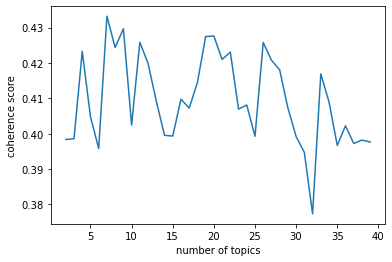

In [15]:
x=range(2,40)
plt.plot(x,coherence_values)
plt.xlabel("number of topics")
plt.ylabel("coherence score")
plt.show() #number of topics= 12

In [16]:
perplexity_values =[]
for i in range(2,40):
    ldamodel=gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary)
    perplexity_values.append(ldamodel.log_perplexity(corpus))

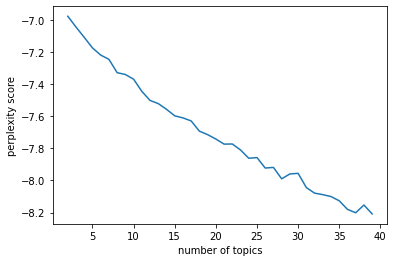

In [17]:
x=range(2,40)
plt.plot(x,perplexity_values)
plt.xlabel('number of topics')
plt.ylabel('perplexity score')
plt.show() # number of topics=12

In [238]:
# 토픽 17개 선정
ldamodel=gensim.models.ldamodel.LdaModel(corpus, num_topics=8, alpha=0.1, id2word=dictionary)
ldamodel.print_topics(num_words=5)

[(0, '0.020*"좋다" + 0.017*"제품" + 0.015*"앱" + 0.014*"사용" + 0.013*"자다"'),
 (1, '0.023*"좋다" + 0.018*"사용" + 0.014*"업데이트" + 0.013*"자다" + 0.011*"어플"'),
 (2, '0.019*"좋다" + 0.017*"연결" + 0.010*"앱" + 0.010*"기능" + 0.008*"자다"'),
 (3, '0.024*"앱" + 0.018*"업데이트" + 0.010*"쓰다" + 0.009*"사용" + 0.008*"기능"'),
 (4, '0.041*"좋다" + 0.015*"편리하다" + 0.013*"스마트" + 0.012*"사용" + 0.012*"기능"'),
 (5, '0.019*"앱" + 0.017*"사용" + 0.013*"업데이트" + 0.012*"자다" + 0.009*"좋다"'),
 (6, '0.016*"좋다" + 0.014*"앱" + 0.011*"업데이트" + 0.009*"기능" + 0.009*"가능하다"'),
 (7, '0.016*"앱" + 0.011*"자다" + 0.009*"사용" + 0.008*"에어컨" + 0.008*"기능"')]

### 토픽별 메인 단어 확인 후 데이터셋 정리

In [239]:
# Get main topic in each document
sent_topics_df = pd.DataFrame()
#ldamodel[corpus]: lda_model에 corpus를 넣어 각 토픽 당 확률을 알 수 있음
for i, row in enumerate(ldamodel[corpus]):
    row = sorted(row, key=lambda x: (x[1]), reverse=True)
    # Get the Dominant topic, Perc Contribution and Keywords for each document
    for j, (topic_num, prop_topic) in enumerate(row):
        if j == 0:  # => dominant topic
            wp = ldamodel.show_topic(topic_num,topn=20)
            topic_keywords = ", ".join([word for word, prop in wp])
            sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
        else:
            break
sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

In [240]:
sent_topics_df

,Dominant_Topic,Perc_Contribution,Topic_Keywords
0,5.0,0.9352,"앱, 사용, 업데이트, 자다, 좋다, 아이폰, 어플, 화면, 연결, 편하다, 제품,..."
1,6.0,0.9748,"좋다, 앱, 업데이트, 기능, 가능하다, 어플, 사용, 작동, 쓰다, 자다, 에어컨..."
2,0.0,0.8541,"좋다, 제품, 앱, 사용, 자다, 가전, 등록, 쓰다, 편하다, LG, 엘지, 편리..."
3,0.0,0.9204,"좋다, 제품, 앱, 사용, 자다, 가전, 등록, 쓰다, 편하다, LG, 엘지, 편리..."
4,0.0,0.9102,"좋다, 제품, 앱, 사용, 자다, 가전, 등록, 쓰다, 편하다, LG, 엘지, 편리..."
...,...,...,...
913,1.0,0.6544,"좋다, 사용, 업데이트, 자다, 어플, 앱, 제품, 연결, 쓰다, 에어컨, 끄다, ..."
914,1.0,0.9285,"좋다, 사용, 업데이트, 자다, 어플, 앱, 제품, 연결, 쓰다, 에어컨, 끄다, ..."
915,0.0,0.8493,"좋다, 제품, 앱, 사용, 자다, 가전, 등록, 쓰다, 편하다, LG, 엘지, 편리..."
916,4.0,0.9583,"좋다, 편리하다, 스마트, 사용, 기능, 연결, 앱, 에어컨, 진단, 업데이트, 자..."


In [241]:
w= []
for i in range(8):
    print(i,'번째',sent_topics_df['Topic_Keywords'][(sent_topics_df['Dominant_Topic']==i)].iloc[1])

0 번째 좋다, 제품, 앱, 사용, 자다, 가전, 등록, 쓰다, 편하다, LG, 엘지, 편리하다, 어플, 업데이트, 관리, 세탁기, 확인, 정말, 뜨다, 보다
1 번째 좋다, 사용, 업데이트, 자다, 어플, 앱, 제품, 연결, 쓰다, 에어컨, 끄다, 아이폰, 기능, 켜다, 다시, 가전, 확인, 집, 보다, 세탁기
2 번째 좋다, 연결, 앱, 기능, 자다, 에어컨, 엘지, 세탁기, 스마트, 설정, 연결하다, 제품, 다시, 쓰다, 보다, 냉장고, 사용, 편하다, 자꾸, 문제
3 번째 앱, 업데이트, 쓰다, 사용, 기능, 좋다, 자다, 어플, 화면, 아이폰, 이후, 문제, 다시, 많다, 보다, 확인, 나오다, 가능하다, 뜨다, 제품
4 번째 좋다, 편리하다, 스마트, 사용, 기능, 연결, 앱, 에어컨, 진단, 업데이트, 자다, 쓰다, 편하다, 어플, 엘지, 제품, 연결하다, 만들다, 아주, 와이파이
5 번째 앱, 사용, 업데이트, 자다, 좋다, 아이폰, 어플, 화면, 연결, 편하다, 제품, 해결, 실행, 멈추다, 쓰다, 부탁드리다, 설정, 계속, 에어컨, 작동
6 번째 좋다, 앱, 업데이트, 기능, 가능하다, 어플, 사용, 작동, 쓰다, 자다, 에어컨, 리모컨, 편리하다, 편하다, 연결, 설정, 엘지, 제품, 보다, 뜨다
7 번째 앱, 자다, 사용, 에어컨, 기능, 계속, 제품, 편리하다, 어플, 보다, 좋다, 쓰다, 연결, 아이폰, 문제, 나오다, 누르다, 실행, 자꾸, 엘지


In [242]:
s = sent_topics_df.groupby(['Dominant_Topic'], as_index=False).count()
s.sort_values(by=['Perc_Contribution'], axis=0)

,Dominant_Topic,Perc_Contribution,Topic_Keywords
2,2.0,54,54
7,7.0,58,58
3,3.0,96,96
6,6.0,98,98
5,5.0,105,105
4,4.0,158,158
1,1.0,165,165
0,0.0,184,184


In [243]:
for i in range(8):
    v = sent_topics_df[(sent_topics_df['Dominant_Topic']==i)]
    v = v.sort_values(by=['Perc_Contribution'],axis=0,ascending=False)
    print(i,'번째')
    print(v.index[:20])

0 번째
Int64Index([328, 268, 807, 604, 649, 911, 699, 501, 101, 531, 752,  35, 704,
             54, 632, 558, 617, 579, 556, 590],
           dtype='int64')
1 번째
Int64Index([730, 582, 546, 527, 875, 801, 559, 549, 656, 828, 674, 568, 577,
             89, 803, 710, 789, 701, 659, 610],
           dtype='int64')
2 번째
Int64Index([573, 740, 683, 517, 557, 540, 298,  92, 775, 622, 811, 511, 156,
            684, 863, 145, 662, 658, 890, 197],
           dtype='int64')
3 번째
Int64Index([550, 500, 284, 384, 221, 759, 845, 578, 562, 790, 409, 709, 857,
            829, 802, 871, 515, 360, 513, 361],
           dtype='int64')
4 번째
Int64Index([542, 723, 841, 242, 881, 910, 514, 567, 834, 109, 754, 912, 831,
            650, 696, 708, 310, 624, 627, 732],
           dtype='int64')
5 번째
Int64Index([853, 523, 293, 547, 341, 375, 539, 390, 601, 154, 796, 630, 406,
            842, 564,  55, 387, 667, 833, 891],
           dtype='int64')
6 번째
Int64Index([518, 504, 526, 437, 118, 589, 553, 448, 592, 31

### LDA 시각화

In [45]:
!pip install pyldavis

  Using cached pyLDAvis-3.3.1-py2.py3-none-any.whl
  Using cached sklearn-0.0-py2.py3-none-any.whl
  Using cached funcy-1.17-py2.py3-none-any.whl (33 kB)


In [246]:
#시각화
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

### 문서분류 Topic Document 만들기

In [37]:
# 문서 분류 (https://wikidocs.net/30708 참고)
for i, topic_list in enumerate(ldamodel[corpus]):
    if i==5:
        break
    print(i,'번째 문서의 topic 비율은',topic_list)

0 번째 문서의 topic 비율은 [(16, 0.9606616)]
1 번째 문서의 topic 비율은 [(15, 0.9442387)]
2 번째 문서의 topic 비율은 [(1, 0.7195491), (16, 0.26425475)]
3 번째 문서의 topic 비율은 [(1, 0.9442304)]
4 번째 문서의 topic 비율은 [(10, 0.93520474)]


In [38]:
def make_topictable_per_doc(ldamodel, corpus):
    topic_table = pd.DataFrame()

    # 몇 번째 문서인지를 의미하는 문서 번호와 해당 문서의 토픽 비중을 한 줄씩 호출.
    for i, topic_list in enumerate(ldamodel[corpus]):
        doc = topic_list[0] if ldamodel.per_word_topics else topic_list            
        doc = sorted(doc, key=lambda x: (x[1]), reverse=True)
        # 각 문서에 대해서 비중이 높은 토픽순으로 토픽을 정렬.
        # EX) 정렬 전 0번 문서 : (2번 토픽, 48.5%), (8번 토픽, 25%), (10번 토픽, 5%), (12번 토픽, 21.5%), 
        # Ex) 정렬 후 0번 문서 : (2번 토픽, 48.5%), (8번 토픽, 25%), (12번 토픽, 21.5%), (10번 토픽, 5%)
        # 48 > 25 > 21 > 5 순으로 정렬이 된 것.

        # 모든 문서에 대해서 각각 아래를 수행
        for j, (topic_num, prop_topic) in enumerate(doc): #  몇 번 토픽인지와 비중을 나눠서 저장
            if j == 0:  # 정렬을 한 상태이므로 가장 앞에 있는 것이 가장 비중이 높은 토픽
                topic_table = topic_table.append(pd.Series([int(topic_num), round(prop_topic,4), topic_list]), ignore_index=True)
                # 가장 비중이 높은 토픽과, 가장 비중이 높은 토픽의 비중과, 전체 토픽의 비중을 저장
            else:
                break
    return(topic_table)

In [39]:
topictable = make_topictable_per_doc(ldamodel, corpus)
topictable = topictable.reset_index() # 문서 번호을 의미하는 열(column).
topictable.columns = ['문서 번호', '가장 비중이 높은 토픽', '가장 높은 토픽의 비중', '각 토픽의 비중']
topictable[:10]

,문서 번호,가장 비중이 높은 토픽,가장 높은 토픽의 비중,각 토픽의 비중
0,0,16.0,0.9607,"[(16, 0.9606618)]"
1,1,15.0,0.9442,"[(15, 0.9442387)]"
2,2,1.0,0.7196,"[(1, 0.71958065), (16, 0.26422325)]"
3,3,1.0,0.9442,"[(1, 0.9442305)]"
4,4,10.0,0.9352,"[(10, 0.93520486)]"
5,5,1.0,0.9262,"[(1, 0.9262466)]"
6,6,11.0,0.9096,"[(11, 0.9095725)]"
7,7,10.0,0.7921,"[(0, 0.012991051), (1, 0.012994069), (2, 0.012..."
8,8,10.0,0.9377,"[(10, 0.93772656)]"
9,9,1.0,0.9657,"[(1, 0.96572906)]"


In [40]:
topictable['각 토픽의 비중'][0]

[(16, 0.9606618)]

In [41]:
total = [] 
num = 0
for i in range(len(topictable)):
    v=[0,0,0,0,0,0,0,0,0,0,0,0]
    for j in topictable['각 토픽의 비중'][i]:
            n = j[0]
            v[n] = j[1]
    print(num)
    num = num+1
    total.append(v)        

IndexError: list assignment index out of range